# Data Analysis: Clustering Algorithms

**Introduction**

This report presents an analysis of a comprehensive dataset of airline booking information,  This dataset is containing 15 columns and 50,002 entries.These attributes range from the number of passengers and sales channel to trip type and various customer preferences such as extra baggage and preferred seating. The dataset provides a rich basis for understanding diverse customer interactions and choices within the airline industry.

**Objective:**

The primary goal of this project is to using unsupervised learning techniques, specifically K-Means and Gaussian Mixture Models (GMM), to analysis customer segmentation. We aim to identify distinct groups within the dataset based on diverse customer behaviors and preferences by grouping customers with similar behaviors, this will help understanding of customer behavior patterns, clarify and refine our business strategy, ensuring it better aligns with the needs and preferences of identified customer segments, thereby enhancing overall customer satisfaction and business performance.

**Dataset Source:** https://www.kaggle.com/datasets/manishkumar7432698/airline-passangers-booking-data/data?select=Passanger_booking_data.csv


### **Environment Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **Data Integration and Initial Exploration**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AIG/ML_Project/Passanger_booking_data.csv")


### **Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Checking for missing values is an important step to ensure data integrity and completeness. It contributes to the accuracy of predictions by maintaining consistent data quality throughout the analysis.

In [ ]:
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


Remove any redundant records from the dataset. This ensures that each data point in our analysis uniquely represents a customer interaction, thereby maintaining the accuracy and reliability of our findings.

In [ ]:
df.drop_duplicates()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,1,Internet,RoundTrip,21,12,6,Tue,Australia,0,0,0,7.21,1,AKL,HGH
1,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,AKL,DEL
2,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,AKL,DEL
3,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,AKL,DEL
4,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,AKL,DEL


### **Pre-processing**
To analyze customer behavior, a subset of relevant features was selected based on their potential to reveal travel patterns and service preferences:

•	length_of_stay may indicate the purpose of travel, such as business vs. leisure.

•	flight_hour reveals preferred travel times.

•	purchase_lead reflects booking habits and urgency.

•	num_passengers distinguishes solo travelers from groups.

•	wants_extra_baggage, wants_preferred_seat, and wants_in_flight_meals capture optional service preferences to identify value-seeking customer segments.

Missing values were imputed using the mean strategy via SimpleImputer. To minimize the impact of outliers and ensure consistency across features, RobustScaler was applied. The processed data was then structured into a DataFrame for further behavioral analysis.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler


# Feature selection
features = ['length_of_stay', 'flight_hour', 'purchase_lead',
            'num_passengers', 'wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals']
df_feature = df[features].copy()

# missing values
imputer = SimpleImputer(strategy='mean')
df_feature = imputer.fit_transform(df_feature)


scaler = RobustScaler()
df_feature = scaler.fit_transform(df_feature)

# Restore to DataFrame
df_feature = pd.DataFrame(df_feature, columns=features)



### **Remove Outlier**

Airline booking data, outliers  number of passengers, length of stay, or purchase lead time can leading to misleading conclusions about typical customer behavior. These outliers may represent data entry errors, special cases not representative of the general population

In [ ]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile Range
    Lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR

    condition =(df[columns] >= Lower_bound) | (df[columns] <= Upper_bound)


    df_clean = df[condition.all(axis=1)]
    return df_clean
df_feature=remove_outliers(df_feature,df_feature.columns)

### **Model Selection & Implement**

We have selected K-Means and Gaussian Mixture Models (GMM) for clustering our airline booking dataset. K-Means is implemented with three clusters to categorize data points into distinct groups based on proximity to the nearest cluster center. In contrast, GMM, also set with three components, offers a probabilistic approach, assigning membership probabilities to each data point across overlapping clusters. This dual approach allows us to analyze customer segments,

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=2)

# Fit and transform your data using PCA
df_pca = pca.fit_transform(df_feature)

# KMeans and GMM
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)

df_feature['Kmeans_Cluster'] = kmeans_labels
df_feature['GMM_Cluster'] = gmm_labels

## **Model Evaluation**

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(df_pca, kmeans_labels)
gmm_silhouette = silhouette_score(df_pca, gmm_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("GMM Silhouette Score:", gmm_silhouette)

K-Means Silhouette Score: 0.503857780263201
GMM Silhouette Score: 0.3284284992076914


## **Visualization**

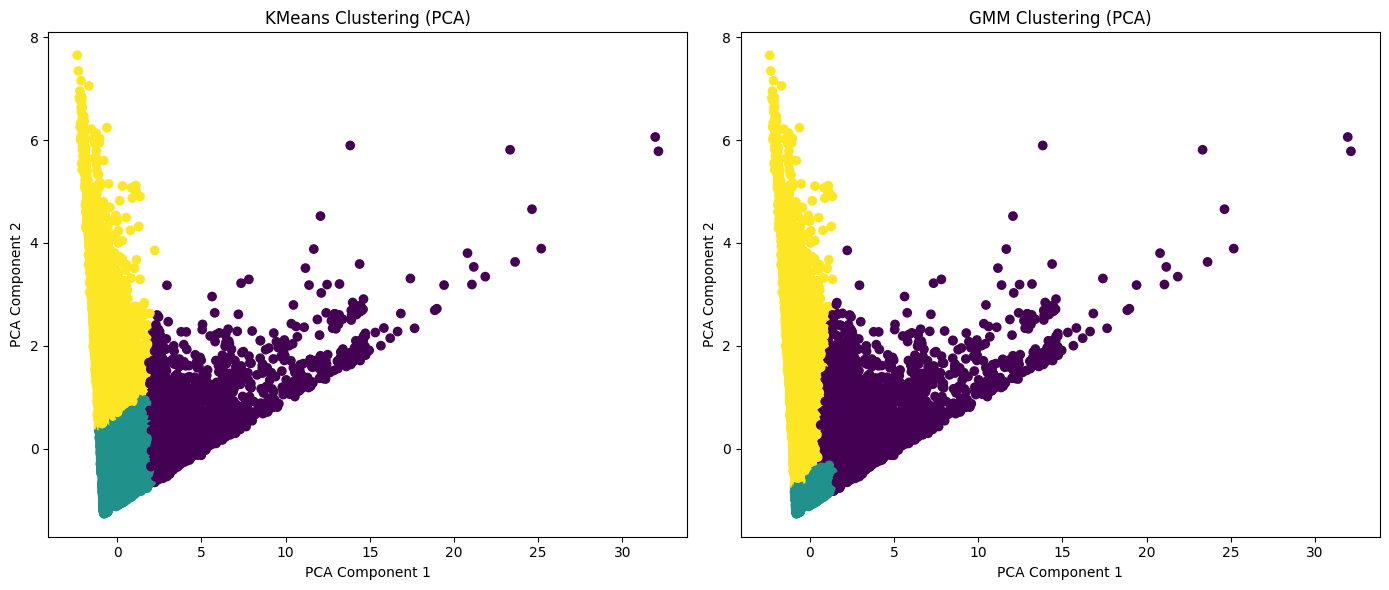

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title('KMeans Clustering (PCA)')
axs[0].set_xlabel('PCA Component 1')
axs[0].set_ylabel('PCA Component 2')

axs[1].scatter(df_pca[:, 0], df_pca[:, 1], c=gmm_labels, cmap='viridis')
axs[1].set_title('GMM Clustering (PCA)')
axs[1].set_xlabel('PCA Component 1')
axs[1].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

df_feature['Kmeans_Cluster'] = kmeans_labels
df_feature['GMM_Cluster'] = gmm_labels

## **Intepretation**

The visualizations and silhouette scores indicate that KMeans performed better than GMM in customer behavior patterns. KMeans achieved a higher silhouette score of 0.504, suggesting that its clusters are well-defined and clearly separated.

In contrast, GMM a lower silhouette score of 0.328, indicating more overlapping clusters. GMM's resulted in less distinct cluster boundaries. These results suggest that KMeans is more suitable for segmenting this customer dataset based on the selected features, offering clearer insights into different behavioral segments.


### **Features Contributing to Model Prediction**

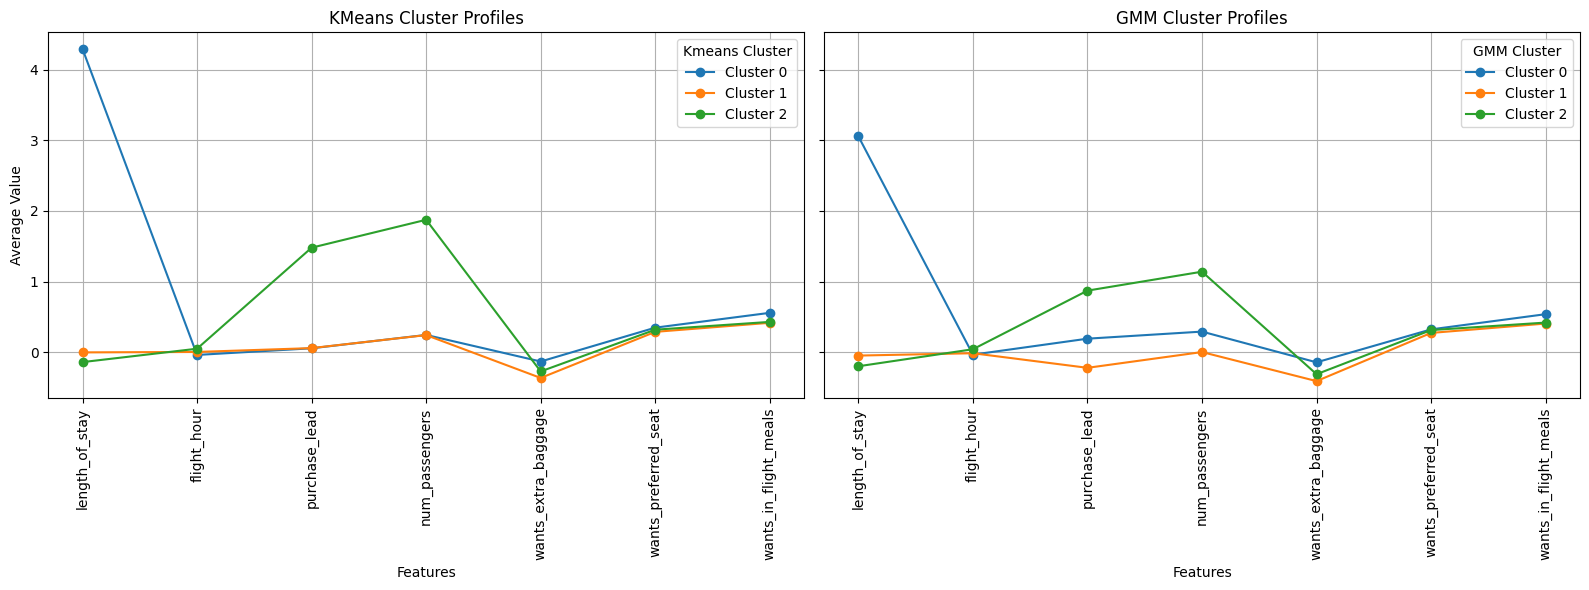

In [ ]:
import matplotlib.pyplot as plt


kmeans_features = df_feature.drop(columns=['GMM_Cluster'])
gmm_features = df_feature.drop(columns=['Kmeans_Cluster'])


kmeans_cluster = kmeans_features.groupby('Kmeans_Cluster').mean().T
gmm_cluster = gmm_features.groupby('GMM_Cluster').mean().T

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


for i in kmeans_cluster.columns:
    axs[0].plot(kmeans_cluster.index, kmeans_cluster[i], marker='o', label=f'Cluster {i}')
axs[0].set_title('KMeans Cluster Profiles')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Average Value')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(True)
axs[0].legend(title="Kmeans Cluster")

# GMM Cluster Profile
for i in gmm_cluster.columns:
    axs[1].plot(gmm_cluster.index, gmm_cluster[i], marker='o', label=f'Cluster {i}')
axs[1].set_title('GMM Cluster Profiles')
axs[1].set_xlabel('Features')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(True)
axs[1].legend(title="GMM Cluster")

plt.tight_layout()
plt.show()


## **Features Contributing to Model Prediction**

**In the KMeans model:**

Cluster 0 has a significantly higher average in length_of_stay, indicating long-term travelers or extended vacations.

Cluster 1 shows little value across most features, potentially representing short-stay passengers with standard preferences.

Cluster 2 displays the highest average values for num_passengers, purchase_lead, and wants_in_flight_meals, suggesting this group likely consists of families or group travelers who plan ahead and show a stronger preference for in-flight services.


**In the GMM model:**

Cluster 0 has similar to what we saw in KMeans, but the difference is not very strong.

Cluster 1 has low values for most features and could represent short-stay travelers or those with fewer needs, but the pattern is not very clear.

Cluster 2 shows higher values for features like Kmeans, but the cluster differences in GMM are less clear than in KMeans.


# **Conclusion**
This analysis to explore customer behavior using selected travel behavior. After preprocessing the data and applying both KMeans and GMM models, the results showed that KMeans performed better in identifying clear and meaningful segments with higher silhouette scores and more distinct feature patterns, making it easier to interpret customer types such as long-term travelers, short-stay passengers, and service preferences.

In contrast, while GMM showed similar trends, its clusters were less clearly pattern and more overlapped, resulting in lower silhouette scores and softer boundaries between groups. Overall, KMeans was more effective for this dataset in revealing actionable insights into customer behavior and segmenting passengers based on their travel characteristics and service preferences.